# <center> Simulation Visualizations

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import pickle

In [297]:
# Load trade volume conversion data for value-to-weight ratio analysis
import json

with open('../part_2_trade_volume_conversion/trade_volume_conversion_output/trade_volume_conversion_general.json', 'r') as f:
    conversion_general = json.load(f)

print(f"Loaded general conversion factors for {len(conversion_general)} HS categories")

Loaded general conversion factors for 96 HS categories


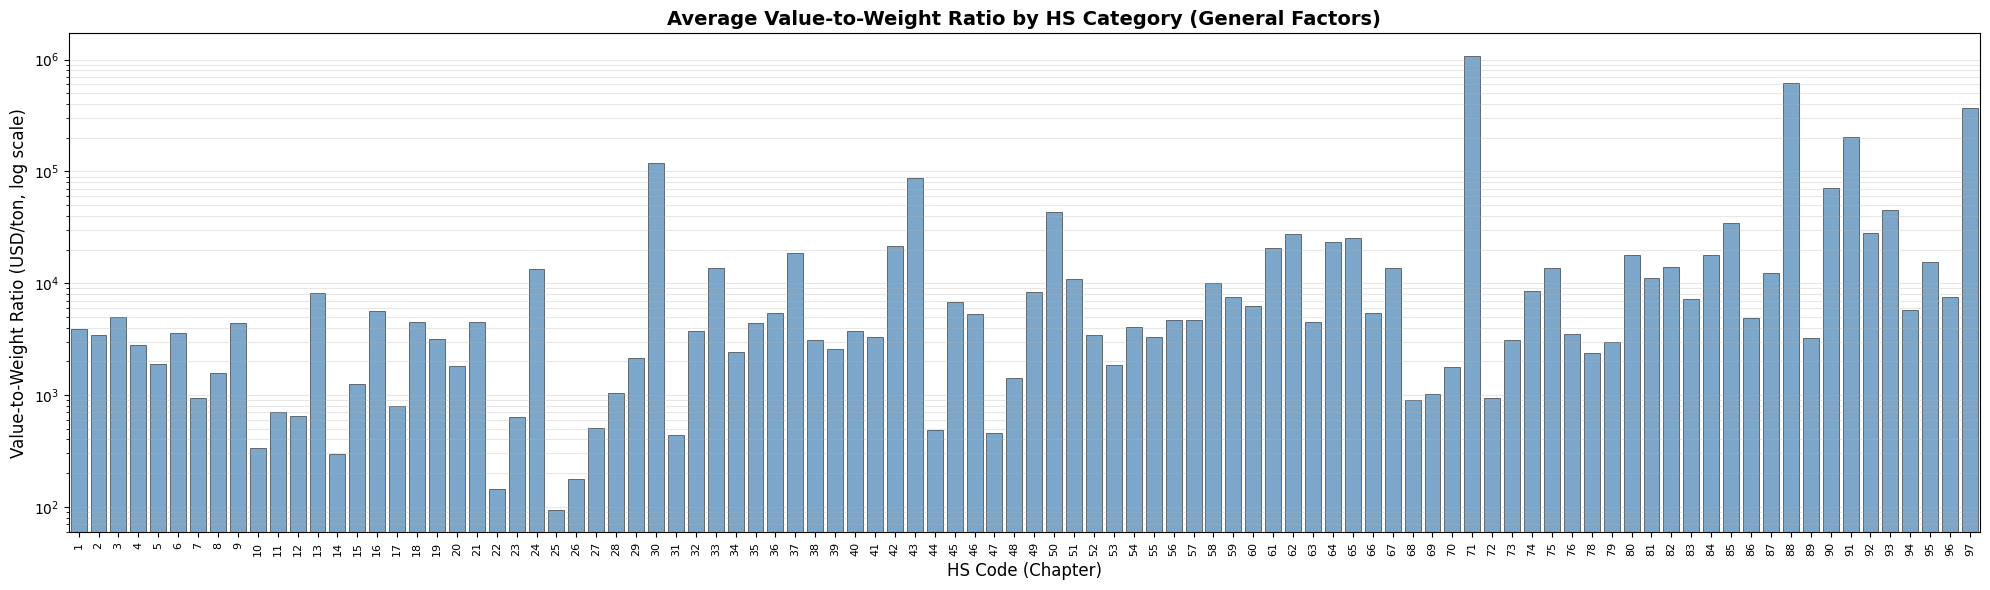

Analyzed 96 HS categories

Top 5 highest average value-to-weight ratios:
  HS71: $1,077,710.69/ton
  HS88: $618,351.04/ton
  HS97: $371,776.33/ton
  HS91: $203,808.29/ton
  HS30: $118,132.96/ton

Top 5 lowest average value-to-weight ratios:
  HS25: $94.00/ton
  HS22: $145.58/ton
  HS26: $176.74/ton
  HS14: $294.91/ton
  HS10: $335.02/ton


In [298]:
# Bar chart: Average value-to-weight ratio for all HS categories (using general factors only)

# Extract average conversion factors from general data
hs_codes = sorted([int(k) for k in conversion_general.keys()])
avg_ratios = [conversion_general[str(hs)]['conversion_factor'] for hs in hs_codes]

# Create figure
fig, ax = plt.subplots(figsize=(20, 6))

# Create bar chart
x_pos = np.arange(len(hs_codes))
bars = ax.bar(x_pos, avg_ratios, color='steelblue', edgecolor='black', linewidth=0.5, alpha=0.7)

# Set log scale on y-axis
ax.set_yscale('log')

# Formatting
ax.set_xlabel('HS Code (Chapter)', fontsize=12)
ax.set_ylabel('Value-to-Weight Ratio (USD/ton, log scale)', fontsize=12)
ax.set_title('Average Value-to-Weight Ratio by HS Category (General Factors)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(hs_codes, rotation=90, fontsize=8)
ax.grid(True, alpha=0.3, axis='y', which='both')

# Fix x-axis limits to remove unnecessary spacing on both ends
ax.set_xlim(-0.5, len(hs_codes) - 0.5)

plt.tight_layout()
plt.show()

print(f"Analyzed {len(hs_codes)} HS categories")
print(f"\nTop 5 highest average value-to-weight ratios:")
top_5_idx = sorted(range(len(avg_ratios)), key=lambda i: avg_ratios[i], reverse=True)[:5]
for idx in top_5_idx:
    print(f"  HS{hs_codes[idx]:02d}: ${avg_ratios[idx]:,.2f}/ton")

print(f"\nTop 5 lowest average value-to-weight ratios:")
bottom_5_idx = sorted(range(len(avg_ratios)), key=lambda i: avg_ratios[i])[:5]
for idx in bottom_5_idx:
    print(f"  HS{hs_codes[idx]:02d}: ${avg_ratios[idx]:,.2f}/ton")

In [299]:
# Load network and edge statistics data
print("Loading network and edge statistics...")

# Load network
with open('../part_3_network_extraction/network_outputs/network_contraction_hierarchies.gpickle', 'rb') as f:
    G_ch = pickle.load(f)

print(f"Network loaded: {G_ch.number_of_nodes()} nodes, {G_ch.number_of_edges()} edges")

# Load edge statistics
edge_stats = pd.read_csv('../part_4_simulation/simulation_output_data/simulation_edge_statistics.csv')
print(f"Edge statistics loaded: {len(edge_stats)} edges")

# Load world map for visualization
world = gpd.read_file('https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip')
print("World map loaded")

# HS code colors - Add new categories here as needed
CARGO_COLORS = {
    10: {'name': 'Grains', 'color': 'orange'},
    25: {'name': 'Salt/Stone/Cement', 'color': 'blue'},  
    27: {'name': 'Mineral Fuels', 'color': 'brown'},
    31: {'name': 'Fertilizers', 'color': 'green'},
    72: {'name': 'Iron/Steel', 'color': 'gray'}
}

Loading network and edge statistics...
Network loaded: 328 nodes, 526 edges
Edge statistics loaded: 526 edges
World map loaded


In [300]:
ship_data = pd.read_csv('../part_4_simulation/simulation_output_data/simulation_ship_data.csv')

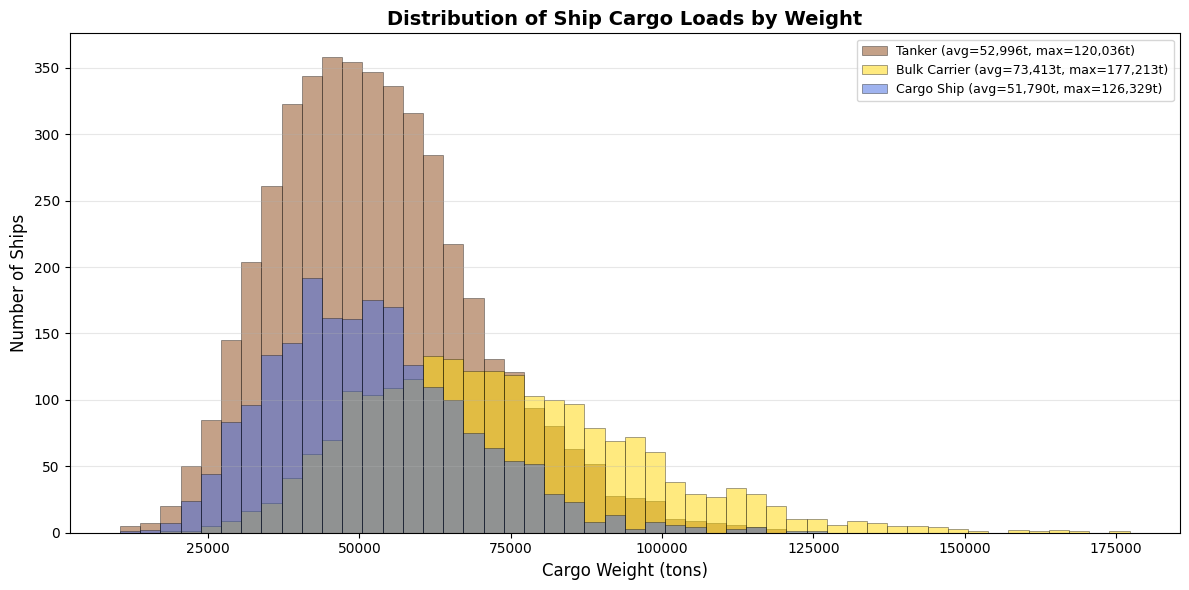

Cargo weight statistics by ship type:
  Tanker: 4491 ships, mean = 52,996 tons, max = 120,036 tons
  Bulk Carrier: 2112 ships, mean = 73,413 tons, max = 177,213 tons
  Cargo Ship: 2078 ships, mean = 51,790 tons, max = 126,329 tons


In [301]:
# Ship type colors (matching Video_Simulation)
SHIP_TYPE_COLORS = {
    'tanker': {'name': 'Tanker', 'color': '#8B4513'},       # Brown
    'bulk carrier': {'name': 'Bulk Carrier', 'color': '#FFD700'},  # Gold
    'cargo ship': {'name': 'Cargo Ship', 'color': '#4169E1'}  # Royal Blue
}

# Histogram of ship cargo loads by WEIGHT
fig, ax = plt.subplots(figsize=(12, 6))

# Determine common bins based on the overall data range
all_weights = ship_data['cargo_total_weight']
weight_min, weight_max = all_weights.min(), all_weights.max()
n_bins = 50
bins = np.linspace(weight_min, weight_max, n_bins + 1)

# Get data for each ship type and plot with shared bins
for ship_type, info in SHIP_TYPE_COLORS.items():
    type_data = ship_data[ship_data['ship_type'] == ship_type]['cargo_total_weight']
    if len(type_data) > 0:
        mean_val = type_data.mean()
        max_val = type_data.max()
        label = f"{info['name']} (avg={mean_val:,.0f}t, max={max_val:,.0f}t)"
        ax.hist(type_data, bins=bins, alpha=0.5, label=label, 
                color=info['color'], edgecolor='black', linewidth=0.5)

ax.set_xlabel('Cargo Weight (tons)', fontsize=12)
ax.set_ylabel('Number of Ships', fontsize=12)
ax.set_title('Distribution of Ship Cargo Loads by Weight', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Cargo weight statistics by ship type:")
for ship_type in SHIP_TYPE_COLORS.keys():
    type_data = ship_data[ship_data['ship_type'] == ship_type]['cargo_total_weight']
    if len(type_data) > 0:
        print(f"  {SHIP_TYPE_COLORS[ship_type]['name']}: {len(type_data)} ships, "
              f"mean = {type_data.mean():,.0f} tons, "
              f"max = {type_data.max():,.0f} tons")

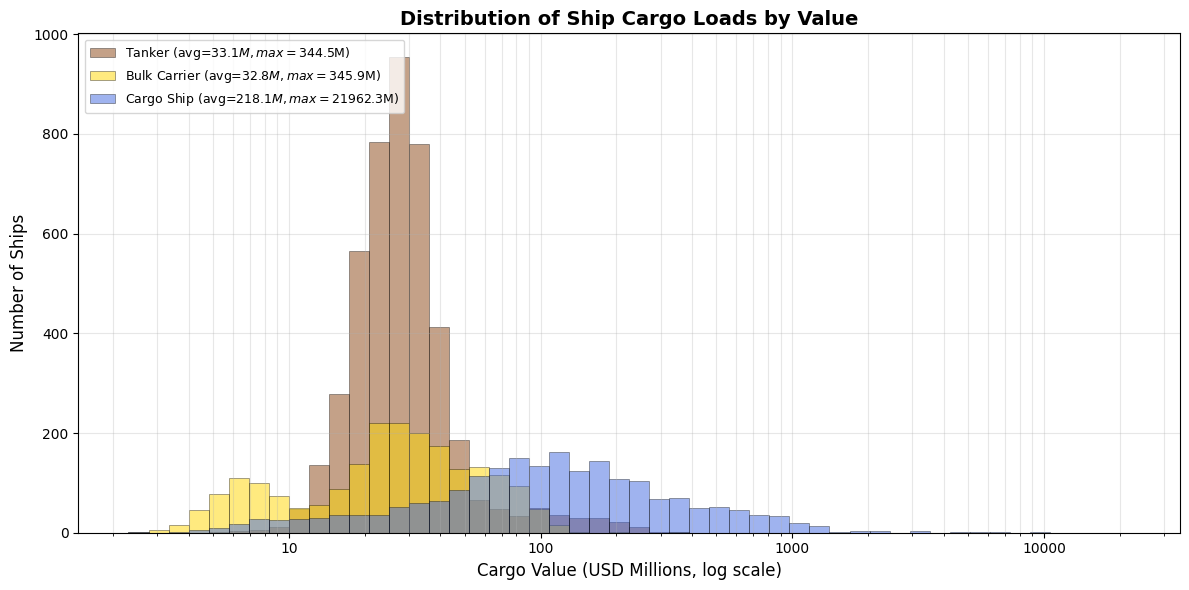

Cargo value statistics by ship type:
  Tanker: 4491 ships, mean = $33,100,176, max = $344,544,060
  Bulk Carrier: 2112 ships, mean = $32,755,361, max = $345,940,224
  Cargo Ship: 2078 ships, mean = $218,081,727, max = $21,962,329,396


In [302]:
# Histogram of ship cargo loads by VALUE (with log scale)
fig, ax = plt.subplots(figsize=(12, 6))

# Determine common bins based on the overall data range (log scale)
all_values = ship_data['cargo_total_value']
# Remove zeros for log scale binning
all_values_nonzero = all_values[all_values > 0]
value_min, value_max = all_values_nonzero.min(), all_values_nonzero.max()
n_bins = 50
# Create log-spaced bins
bins = np.logspace(np.log10(value_min), np.log10(value_max), n_bins + 1)

# Get data for each ship type and plot with shared bins
for ship_type, info in SHIP_TYPE_COLORS.items():
    type_data = ship_data[ship_data['ship_type'] == ship_type]['cargo_total_value']
    if len(type_data) > 0:
        mean_val = type_data.mean()
        max_val = type_data.max()
        label = f"{info['name']} (avg=${mean_val/1e6:.1f}M, max=${max_val/1e6:.1f}M)"
        ax.hist(type_data, bins=bins, alpha=0.5, label=label, 
                color=info['color'], edgecolor='black', linewidth=0.5)

# Set log scale on x-axis
ax.set_xscale('log')

# Convert x-axis to millions with log scale
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}'))

ax.set_xlabel('Cargo Value (USD Millions, log scale)', fontsize=12)
ax.set_ylabel('Number of Ships', fontsize=12)
ax.set_title('Distribution of Ship Cargo Loads by Value', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3, axis='both', which='both')
plt.tight_layout()
plt.show()

print("Cargo value statistics by ship type:")
for ship_type in SHIP_TYPE_COLORS.keys():
    type_data = ship_data[ship_data['ship_type'] == ship_type]['cargo_total_value']
    if len(type_data) > 0:
        print(f"  {SHIP_TYPE_COLORS[ship_type]['name']}: {len(type_data)} ships, "
              f"mean = ${type_data.mean():,.0f}, "
              f"max = ${type_data.max():,.0f}")

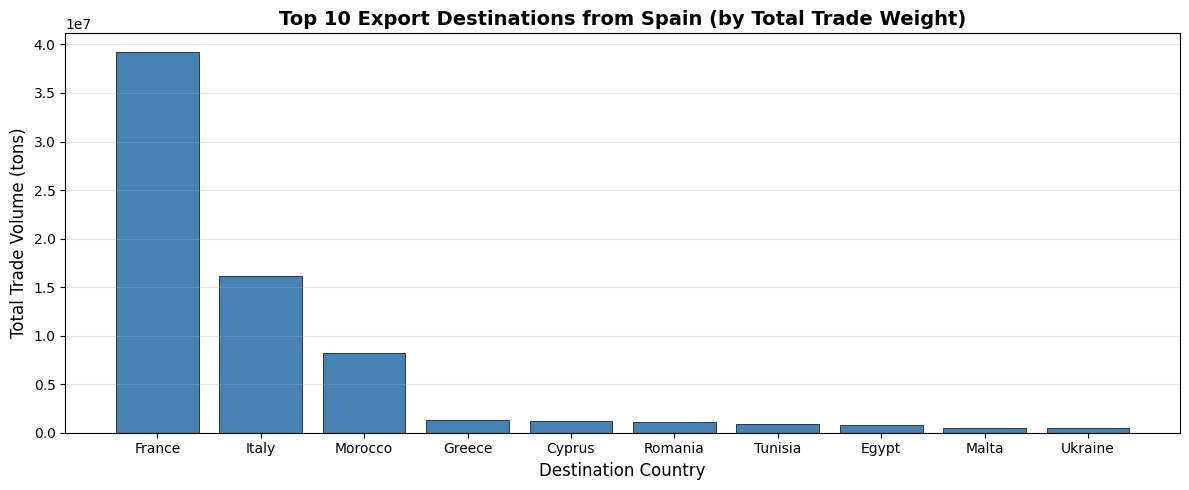

Total exports from Spain: 71,965,446 tons
Total export value from France: $133,309,453,291
Number of ships from France: 1269


In [303]:
# Bar chart: Top 10 countries France exports to (by weight)
france_exports = ship_data[ship_data['origin_country'] == 'Spain'].copy()
exports_by_country = france_exports.groupby('dest_country')['cargo_total_weight'].sum().sort_values(ascending=False)
top_10_destinations = exports_by_country.head(10)

plt.figure(figsize=(12, 5))
bars = plt.bar(range(len(top_10_destinations)), top_10_destinations.values, 
               color='steelblue', edgecolor='black', linewidth=0.5)
plt.xticks(range(len(top_10_destinations)), top_10_destinations.index, ha='center')

# Show values in tons
ax = plt.gca()

plt.xlabel('Destination Country', fontsize=12)
plt.ylabel('Total Trade Volume (tons)', fontsize=12)
plt.title('Top 10 Export Destinations from Spain (by Total Trade Weight)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Total exports from Spain: {france_exports['cargo_total_weight'].sum():,.0f} tons")
print(f"Total export value from France: ${france_exports['cargo_total_value'].sum():,.0f}")
print(f"Number of ships from France: {len(france_exports)}")

France → Algeria Route:

France → Algeria - Ship IDs at each percentile (sorted by weight):
  5th: Ship ID 4595 - bulk carrier - Weight: 95,287 tons, Value: $46,028,863
  15th: Ship ID 3835 - bulk carrier - Weight: 82,061 tons, Value: $27,491,748
  25th: Ship ID 5630 - tanker - Weight: 75,087 tons, Value: $232,633,063
  35th: Ship ID 3260 - bulk carrier - Weight: 71,270 tons, Value: $23,876,798
  45th: Ship ID 3197 - cargo ship - Weight: 62,035 tons, Value: $47,424,112
  55th: Ship ID 5519 - bulk carrier - Weight: 56,740 tons, Value: $19,008,770
  65th: Ship ID 4442 - cargo ship - Weight: 52,035 tons, Value: $140,477,722
  75th: Ship ID 5891 - cargo ship - Weight: 42,323 tons, Value: $240,637,613
  85th: Ship ID 2982 - tanker - Weight: 36,442 tons, Value: $18,535,233
  95th: Ship ID 5926 - cargo ship - Weight: 28,202 tons, Value: $72,560,379

Top 5 HS codes by weight for France → Algeria:
  HS10 (Cereals): 210,070 tons
  HS44 (Wood and articles of wood; wood charcoal): 95,287 tons
  HS

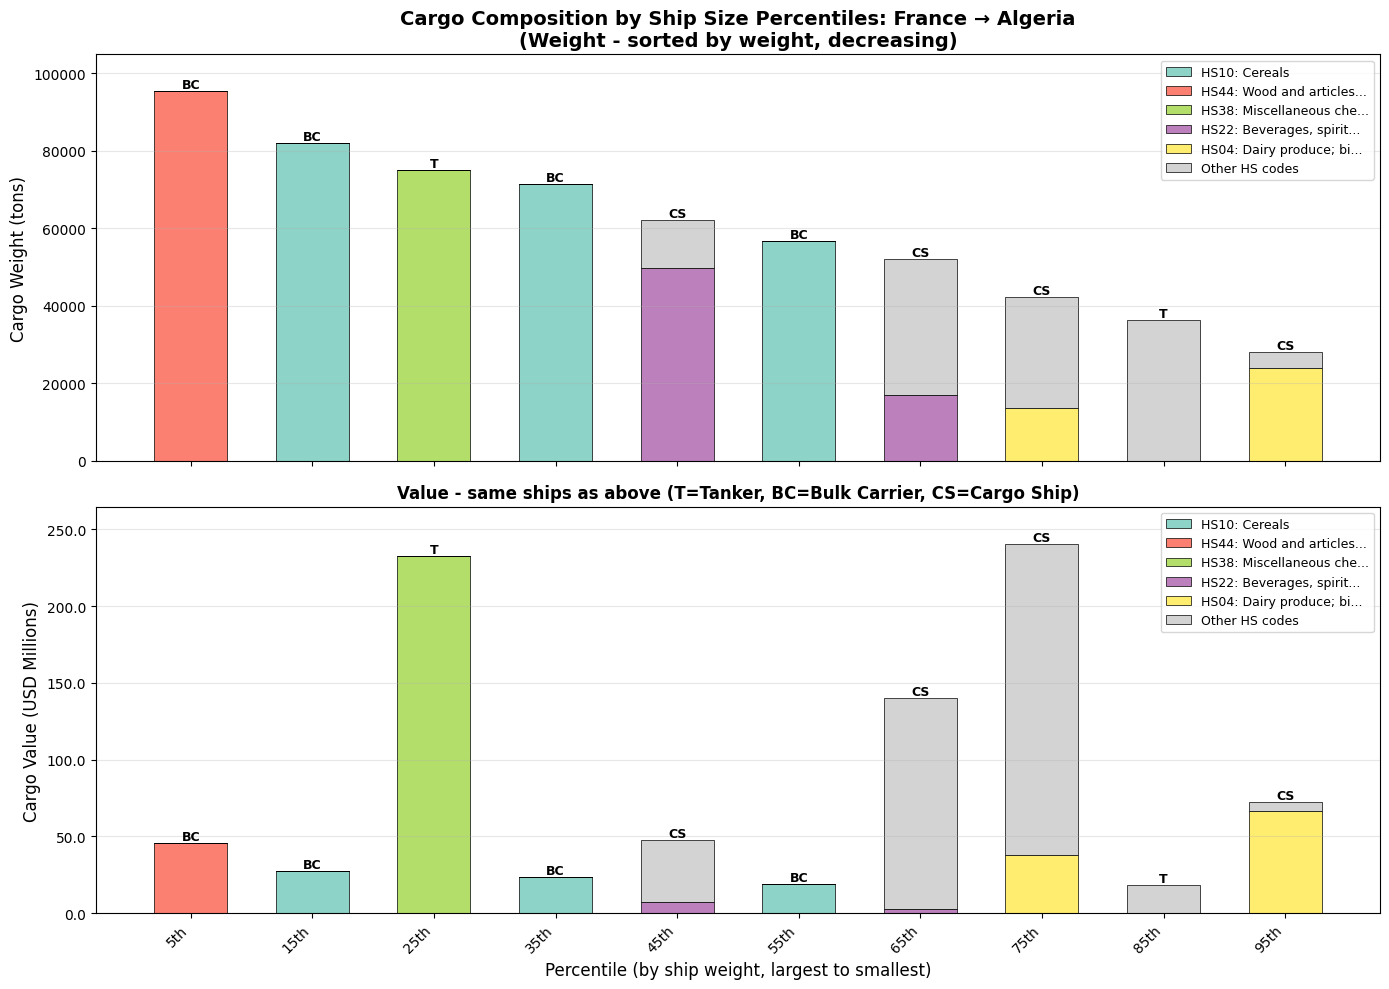


France → Algeria Statistics:
  Total ships: 31
  Total cargo value: $4,454,527,082
  Total cargo weight: 1,867,941 tons
  Average cargo per ship (value): $143,694,422
  Average cargo per ship (weight): 60,256 tons
  Ship type distribution:
    Tanker: 3 ships (9.7%)
    Bulk Carrier: 17 ships (54.8%)
    Cargo Ship: 11 ships (35.5%)


France → Spain Route:

France → Spain - Ship IDs at each percentile (sorted by weight):
  5th: Ship ID 2176 - bulk carrier - Weight: 98,330 tons, Value: $92,013,971
  15th: Ship ID 7760 - tanker - Weight: 84,014 tons, Value: $42,731,455
  25th: Ship ID 3240 - cargo ship - Weight: 72,239 tons, Value: $206,863,373
  35th: Ship ID 2750 - bulk carrier - Weight: 64,542 tons, Value: $21,622,707
  45th: Ship ID 3614 - tanker - Weight: 58,806 tons, Value: $221,941,044
  55th: Ship ID 4458 - tanker - Weight: 53,938 tons, Value: $27,433,958
  65th: Ship ID 3111 - tanker - Weight: 49,888 tons, Value: $25,373,905
  75th: Ship ID 210 - cargo ship - Weight: 45,068 ton

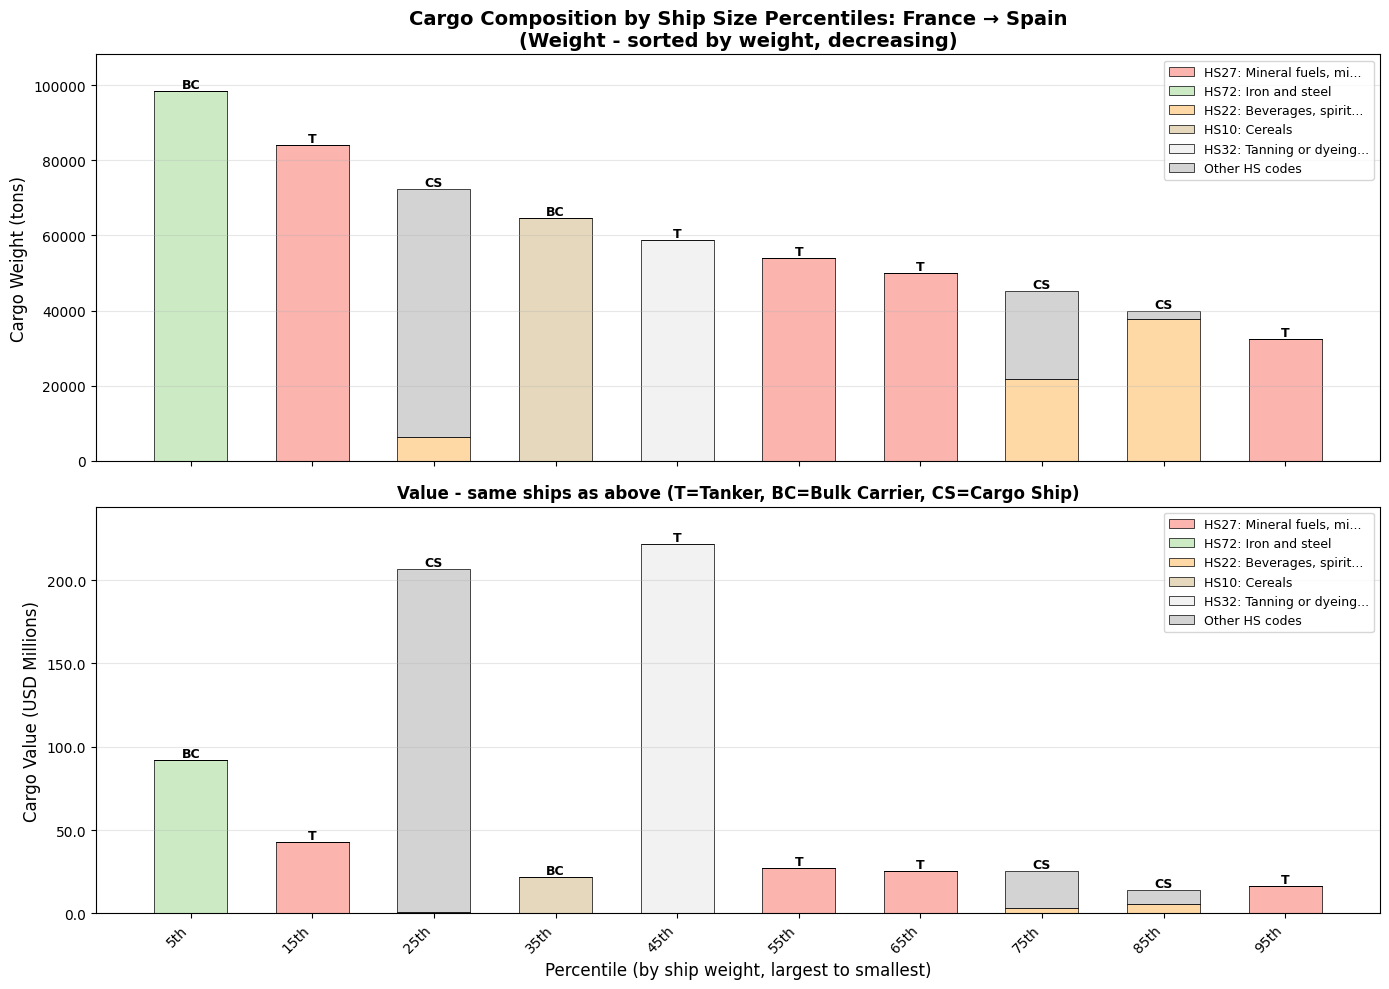


France → Spain Statistics:
  Total ships: 411
  Total cargo value: $37,785,060,271
  Total cargo weight: 24,762,363 tons
  Average cargo per ship (value): $91,934,453
  Average cargo per ship (weight): 60,249 tons
  Ship type distribution:
    Tanker: 99 ships (24.1%)
    Bulk Carrier: 142 ships (34.5%)
    Cargo Ship: 170 ships (41.4%)


In [304]:
# Stacked bar charts for France-Algeria and France-Spain routes showing cargo composition by size percentiles

# Load HS codes mapping for getting all HS codes in the data
with open('../../data/hs_codes_mapping.json', 'r') as f:
    hs_codes_mapping = json.load(f)

# Get all HS codes from ship data columns
hs_codes_in_data = []
for col in ship_data.columns:
    if col.startswith('cargo_hs') and col.endswith('_value'):
        hs_code = int(col.replace('cargo_hs', '').replace('_value', ''))
        hs_codes_in_data.append(hs_code)
hs_codes_in_data = sorted(hs_codes_in_data)

# Filter ships for France-Algeria route
france_algeria = ship_data[(ship_data['origin_country'] == 'France') & 
                           (ship_data['dest_country'] == 'Algeria')].copy()

# Filter ships for France-Spain route
france_spain = ship_data[(ship_data['origin_country'] == 'France') & 
                         (ship_data['dest_country'] == 'Spain')].copy()

def create_percentile_stacked_bars(route_data, route_name, colormap='Set3'):
    """Create double stacked bar chart showing cargo composition by weight and value"""
    
    # Sort by total cargo WEIGHT (this is key!)
    route_data = route_data.sort_values('cargo_total_weight', ascending=False)
    
    # Calculate percentile positions (from largest to smallest: 0.05, 0.15, ..., 0.95)
    percentiles = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
    percentile_labels = ['5th', '15th', '25th', '35th', '45th', '55th', '65th', '75th', '85th', '95th']
    
    # Get ships at each percentile
    n_ships = len(route_data)
    percentile_ships = []
    percentile_ship_types = []
    percentile_ship_ids = []
    
    for p in percentiles:
        idx = int(p * n_ships)
        if idx >= n_ships:
            idx = n_ships - 1
        ship = route_data.iloc[idx]
        percentile_ships.append(ship)
        percentile_ship_types.append(ship['ship_type'])
        percentile_ship_ids.append(ship['ship_id'])
    
    # Print ship IDs for debugging
    print(f"\n{route_name} - Ship IDs at each percentile (sorted by weight):")
    for i, (label, ship_id, ship) in enumerate(zip(percentile_labels, percentile_ship_ids, percentile_ships)):
        print(f"  {label}: Ship ID {ship_id} - {ship['ship_type']} - "
              f"Weight: {ship['cargo_total_weight']:,.0f} tons, Value: ${ship['cargo_total_value']:,.0f}")
    
    # Calculate the top 5 HS codes BY WEIGHT across the percentile ships (not by value!)
    hs_weight_totals = {}
    for hs_code in hs_codes_in_data:
        col_name = f'cargo_hs{hs_code}_weight'
        # Sum the weight of this HS code across all percentile ships
        total_weight = sum(ship[col_name] if col_name in ship else 0 for ship in percentile_ships)
        if total_weight > 0:
            hs_weight_totals[hs_code] = total_weight
    
    # Get top 5 HS codes by WEIGHT (not value!)
    top_5_hs = sorted(hs_weight_totals.items(), key=lambda x: x[1], reverse=True)[:5]
    top_5_hs_codes = [hs for hs, _ in top_5_hs]
    
    print(f"\nTop 5 HS codes by weight for {route_name}:")
    for hs_code, weight in top_5_hs:
        hs_name = hs_codes_mapping.get(str(hs_code).zfill(2), {}).get('name', f'HS{hs_code}')
        print(f"  HS{hs_code:02d} ({hs_name}): {weight:,.0f} tons")
    
    # Extract WEIGHT values for top 5 HS codes
    hs_weights = {}
    for hs_code in top_5_hs_codes:
        col_name = f'cargo_hs{hs_code}_weight'
        hs_weights[hs_code] = [ship[col_name] if col_name in ship else 0 for ship in percentile_ships]
    
    # Calculate "Other" weight (all HS codes not in top 5)
    other_weights = []
    for ship in percentile_ships:
        total_weight = ship['cargo_total_weight']
        top_5_weight = sum(ship[f'cargo_hs{hs}_weight'] if f'cargo_hs{hs}_weight' in ship else 0 
                          for hs in top_5_hs_codes)
        other_weight = total_weight - top_5_weight
        other_weights.append(max(0, other_weight))  # Ensure non-negative
    
    # Extract VALUE values for top 5 HS codes
    hs_values = {}
    for hs_code in top_5_hs_codes:
        col_name = f'cargo_hs{hs_code}_value'
        hs_values[hs_code] = [ship[col_name] if col_name in ship else 0 for ship in percentile_ships]
    
    # Calculate "Other" value (all HS codes not in top 5)
    other_values = []
    for ship in percentile_ships:
        total_value = ship['cargo_total_value']
        top_5_value = sum(ship[f'cargo_hs{hs}_value'] if f'cargo_hs{hs}_value' in ship else 0 
                         for hs in top_5_hs_codes)
        other_value = total_value - top_5_value
        other_values.append(max(0, other_value))  # Ensure non-negative
    
    # Create double stacked bar chart (weight on top, value on bottom)
    x = np.arange(len(percentile_labels))
    width = 0.6
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # Use the specified colormap for the top 5 HS codes
    colors = plt.get_cmap(colormap)(np.linspace(0, 1, len(top_5_hs_codes)))
    
    # TOP PLOT: Weight composition
    bottom_weight = np.zeros(len(percentile_labels))
    
    # First, plot the top 5 HS codes
    for i, hs_code in enumerate(top_5_hs_codes):
        hs_name = hs_codes_mapping.get(str(hs_code).zfill(2), {}).get('name', f'HS{hs_code}')
        # Shorten name if too long
        if len(hs_name) > 20:
            hs_name = hs_name[:17] + '...'
        
        ax1.bar(x, hs_weights[hs_code], width, bottom=bottom_weight,
                label=f'HS{hs_code:02d}: {hs_name}',
                color=colors[i], 
                edgecolor='black', linewidth=0.5)
        bottom_weight += np.array(hs_weights[hs_code])
    
    # Then add "Other" category on top
    ax1.bar(x, other_weights, width, bottom=bottom_weight,
            label='Other HS codes',
            color='lightgray', 
            edgecolor='black', linewidth=0.5)
    bottom_weight += np.array(other_weights)
    
    # Add ship type labels above each bar in top plot
    for i, ship_type in enumerate(percentile_ship_types):
        ship_type_name = SHIP_TYPE_COLORS.get(ship_type, {}).get('name', ship_type)
        # Abbreviate ship type names
        abbrev = {'Tanker': 'T', 'Bulk Carrier': 'BC', 'Cargo Ship': 'CS'}.get(ship_type_name, ship_type_name[:2])
        ax1.text(x[i], bottom_weight[i], abbrev, ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Format top plot
    ax1.set_ylabel('Cargo Weight (tons)', fontsize=12)
    ax1.set_title(f'Cargo Composition by Ship Size Percentiles: {route_name}\n(Weight - sorted by weight, decreasing)', 
                  fontsize=14, fontweight='bold')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, alpha=0.3, axis='y')
    # Add space at top of y-axis
    ax1.set_ylim(0, max(bottom_weight) * 1.1)
    
    # BOTTOM PLOT: Value composition (same ships, different metric)
    bottom_value = np.zeros(len(percentile_labels))
    
    # First, plot the top 5 HS codes
    for i, hs_code in enumerate(top_5_hs_codes):
        hs_name = hs_codes_mapping.get(str(hs_code).zfill(2), {}).get('name', f'HS{hs_code}')
        if len(hs_name) > 20:
            hs_name = hs_name[:17] + '...'
        
        ax2.bar(x, hs_values[hs_code], width, bottom=bottom_value,
                label=f'HS{hs_code:02d}: {hs_name}',
                color=colors[i], 
                edgecolor='black', linewidth=0.5)
        bottom_value += np.array(hs_values[hs_code])
    
    # Then add "Other" category on top
    ax2.bar(x, other_values, width, bottom=bottom_value,
            label='Other HS codes',
            color='lightgray', 
            edgecolor='black', linewidth=0.5)
    bottom_value += np.array(other_values)
    
    # Add ship type labels above each bar in bottom plot
    for i, ship_type in enumerate(percentile_ship_types):
        ship_type_name = SHIP_TYPE_COLORS.get(ship_type, {}).get('name', ship_type)
        abbrev = {'Tanker': 'T', 'Bulk Carrier': 'BC', 'Cargo Ship': 'CS'}.get(ship_type_name, ship_type_name[:2])
        ax2.text(x[i], bottom_value[i], abbrev, ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Convert y-axis to millions for value plot
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))
    
    # Format bottom plot
    ax2.set_xlabel('Percentile (by ship weight, largest to smallest)', fontsize=12)
    ax2.set_ylabel('Cargo Value (USD Millions)', fontsize=12)
    ax2.set_title(f'Value - same ships as above (T=Tanker, BC=Bulk Carrier, CS=Cargo Ship)', 
                  fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(percentile_labels, rotation=45, ha='right')
    ax2.legend(loc='upper right', fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')
    # Add space at top of y-axis
    ax2.set_ylim(0, max(bottom_value) * 1.1)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{route_name} Statistics:")
    print(f"  Total ships: {n_ships}")
    print(f"  Total cargo value: ${route_data['cargo_total_value'].sum():,.0f}")
    print(f"  Total cargo weight: {route_data['cargo_total_weight'].sum():,.0f} tons")
    print(f"  Average cargo per ship (value): ${route_data['cargo_total_value'].mean():,.0f}")
    print(f"  Average cargo per ship (weight): {route_data['cargo_total_weight'].mean():,.0f} tons")
    print(f"  Ship type distribution:")
    for ship_type in SHIP_TYPE_COLORS.keys():
        count = (route_data['ship_type'] == ship_type).sum()
        if count > 0:
            print(f"    {SHIP_TYPE_COLORS[ship_type]['name']}: {count} ships ({100*count/n_ships:.1f}%)")

# Create plots for both routes with different color schemes
print("France → Algeria Route:")
create_percentile_stacked_bars(france_algeria, 'France → Algeria', colormap='Set3')

print("\n" + "="*70)
print("\nFrance → Spain Route:")
create_percentile_stacked_bars(france_spain, 'France → Spain', colormap='Pastel1')

# <center> Trade Volume Network Visualizations

In [305]:
# Create edge cargo lookup dictionaries for ALL HS codes in the data

def convert_node_id(node):
    """Convert node ID from CSV string to appropriate type (int or str)"""
    node_str = str(node).strip()
    
    # Check if it starts with 'port_'
    if node_str.startswith('port_'):
        return node_str  # Keep as string
    
    # Try to convert to int
    try:
        return int(node_str)
    except (ValueError, TypeError):
        return node_str  # Keep as string if conversion fails

# Build a lookup for canonical edge directions from the graph
# This handles the fact that undirected graphs can be queried in either direction
# but G.edges() returns them in a specific canonical form
canonical_edges = {}
for u, v in G_ch.edges():
    canonical_edges[(u, v)] = (u, v)
    canonical_edges[(v, u)] = (u, v)  # Both directions map to the same canonical form

print(f"Built canonical edge lookup with {len(canonical_edges)} entries ({G_ch.number_of_edges()} unique edges)")

# Get all HS codes from edge_stats columns
all_hs_codes = []
for col in edge_stats.columns:
    if col.startswith('cargo_hs') and col.endswith('_weight'):
        hs_code = int(col.replace('cargo_hs', '').replace('_weight', ''))
        all_hs_codes.append(hs_code)
all_hs_codes = sorted(all_hs_codes)

print(f"Found {len(all_hs_codes)} HS codes in edge statistics")

# Build edge cargo dictionaries for ALL HS codes
edge_cargo_total_weight = {}
edge_cargo_total_value = {}
edge_cargo_by_hs_weight = {hs_code: {} for hs_code in all_hs_codes}
edge_cargo_by_hs_value = {hs_code: {} for hs_code in all_hs_codes}

# Track validation statistics
total_csv_rows = len(edge_stats)
matched_edges = 0
unmatched_edges = []

for idx, row in edge_stats.iterrows():
    # Store original values for debugging
    original_node1 = row['node1']
    original_node2 = row['node2']
    
    # Convert nodes to appropriate types
    node1 = convert_node_id(original_node1)
    node2 = convert_node_id(original_node2)
    
    # Look up canonical edge direction
    edge_key = canonical_edges.get((node1, node2))
    
    # Validate edge exists in graph
    if edge_key is None:
        unmatched_edges.append((original_node1, original_node2, node1, node2))
        continue
    
    matched_edges += 1
    
    # Store total cargo (weight and value)
    edge_cargo_total_weight[edge_key] = row['cargo_total_weight']
    edge_cargo_total_value[edge_key] = row['cargo_total_value']
    
    # Store cargo for each HS code (weight and value)
    for hs_code in all_hs_codes:
        weight_col = f'cargo_hs{hs_code}_weight'
        value_col = f'cargo_hs{hs_code}_value'
        if weight_col in row:
            edge_cargo_by_hs_weight[hs_code][edge_key] = row[weight_col]
        if value_col in row:
            edge_cargo_by_hs_value[hs_code][edge_key] = row[value_col]

# Validation report
print("=" * 60)
print("EDGE MATCHING VALIDATION")
print("=" * 60)
print(f"Total edges in graph: {G_ch.number_of_edges()}")
print(f"Total rows in CSV: {total_csv_rows}")
print(f"Successfully matched edges: {matched_edges}")
print(f"Unmatched edges from CSV: {len(unmatched_edges)}")

if unmatched_edges:
    print("\nWARNING: The following CSV edges don't exist in the graph:")
    for orig1, orig2, conv1, conv2 in unmatched_edges[:10]:  # Show first 10
        print(f"  CSV: ({orig1}, {orig2}) -> Converted: ({conv1}, {conv2})")
    if len(unmatched_edges) > 10:
        print(f"  ... and {len(unmatched_edges) - 10} more")
else:
    print("✓ All CSV edges successfully matched to graph edges")

# Check for edges in graph that aren't in CSV
edges_in_graph = set(G_ch.edges())
edges_in_csv = set(edge_cargo_total_weight.keys())
missing_from_csv = edges_in_graph - edges_in_csv

if missing_from_csv:
    print(f"\nWARNING: {len(missing_from_csv)} edges exist in graph but not in CSV:")
    print("First 10 missing edges:")
    for edge in list(missing_from_csv)[:10]:
        print(f"  {edge}")
else:
    print("✓ All graph edges are present in CSV")

print("=" * 60)

# Calculate max cargo for scaling (weight and value)
max_cargo_total_weight = max(edge_cargo_total_weight.values()) if edge_cargo_total_weight else 0
max_cargo_total_value = max(edge_cargo_total_value.values()) if edge_cargo_total_value else 0

max_cargo_by_hs_weight = {hs_code: max(cargo_dict.values()) if cargo_dict else 0 
                          for hs_code, cargo_dict in edge_cargo_by_hs_weight.items()}
max_cargo_by_hs_value = {hs_code: max(cargo_dict.values()) if cargo_dict else 0 
                         for hs_code, cargo_dict in edge_cargo_by_hs_value.items()}

print(f"\nCargo Statistics:")
print(f"Max cargo total weight: {max_cargo_total_weight:,.0f} tons")
print(f"Max cargo total value: ${max_cargo_total_value:,.0f}")
print(f"\nSample HS codes (first 5):")
for hs_code in all_hs_codes[:5]:
    print(f"  HS{hs_code:02d} - Weight: {max_cargo_by_hs_weight[hs_code]:,.0f} tons, Value: ${max_cargo_by_hs_value[hs_code]:,.0f}")

Built canonical edge lookup with 1052 entries (526 unique edges)
Found 96 HS codes in edge statistics
EDGE MATCHING VALIDATION
Total edges in graph: 526
Total rows in CSV: 526
Successfully matched edges: 526
Unmatched edges from CSV: 0
✓ All CSV edges successfully matched to graph edges
✓ All graph edges are present in CSV

Cargo Statistics:
Max cargo total weight: 100,918,442 tons
Max cargo total value: $218,799,428,628

Sample HS codes (first 5):
  HS01 - Weight: 542,171 tons, Value: $2,214,260,799
  HS02 - Weight: 801,927 tons, Value: $3,111,873,624
  HS03 - Weight: 325,215 tons, Value: $2,347,528,499
  HS04 - Weight: 627,407 tons, Value: $2,894,577,836
  HS05 - Weight: 105,404 tons, Value: $115,597,307


In [306]:
# Setup for network plotting
# Edge width scaling parameters
MIN_EDGE_WIDTH = 0.3
MAX_EDGE_WIDTH = 10.0

# Get network extent
lons = [G_ch.nodes[n]['lon'] for n in G_ch.nodes()]
lats = [G_ch.nodes[n]['lat'] for n in G_ch.nodes()]
lon_min, lon_max = min(lons) - 1, max(lons) + 1
lat_min, lat_max = min(lats) - 1, max(lats) + 1

# Get node positions
pos = nx.get_node_attributes(G_ch, 'pos')

# Identify port nodes
port_nodes = [n for n in G_ch.nodes() if G_ch.nodes[n].get('source') == 'port']
port_pos = {n: pos[n] for n in port_nodes}

print("Network plotting setup complete")

Network plotting setup complete


In [307]:
# Updated plot_cargo_volume function with new parameters
def plot_cargo_volume(hs_code, edge_color, metric='weight', figsize=(20, 16), debugging_print=False):
    """
    Plot network with cargo volume visualization for a specific HS code or total
    
    Parameters:
    -----------
    hs_code : int or 'Total'
        The HS code to visualize (e.g., 10, 25, 27, etc.) or 'Total' for all cargo
    edge_color : str
        Color for the edges (e.g., 'orange', '#FF5733', etc.)
    metric : str
        'weight' for weight in tons, or 'value' for value in USD
    figsize : tuple
        Figure size (width, height)
    debugging_print : bool
        If True, print debugging statistics about edges and cargo volumes
    """
    # Validate metric
    if metric not in ['weight', 'value']:
        raise ValueError(f"metric must be 'weight' or 'value', got '{metric}'")
    
    # Handle Total vs specific HS code
    if hs_code == 'Total' or hs_code == 'TOTAL':
        # Use total cargo across all HS codes
        if metric == 'weight':
            cargo_dict = edge_cargo_total_weight
            max_cargo = max_cargo_total_weight
            title = f'Total Trade Volume Across All HS Categories\nby Weight (tons)'
            metric_label = 'tons'
        else:  # value
            cargo_dict = edge_cargo_total_value
            max_cargo = max_cargo_total_value
            title = f'Total Trade Volume Across All HS Categories\nby Value (USD)'
            metric_label = 'USD'
    else:
        # Validate hs_code
        if hs_code not in all_hs_codes:
            raise ValueError(f"HS code {hs_code} not found in data. Available codes: {all_hs_codes}")
        
        # Get HS code name from mapping
        hs_name = hs_codes_mapping.get(str(hs_code).zfill(2), {}).get('name', f'HS{hs_code}')
        
        # Determine which cargo dictionary and max to use based on metric
        if metric == 'weight':
            cargo_dict = edge_cargo_by_hs_weight[hs_code]
            max_cargo = max_cargo_by_hs_weight[hs_code]
            title = f'HS{hs_code:02d} - {hs_name}\nTrade Volume by Weight (tons)'
            metric_label = 'tons'
        else:  # value
            cargo_dict = edge_cargo_by_hs_value[hs_code]
            max_cargo = max_cargo_by_hs_value[hs_code]
            title = f'HS{hs_code:02d} - {hs_name}\nTrade Volume by Value (USD)'
            metric_label = 'USD'
    
    # Calculate total volume for legend (from ship_data, not edges, to avoid counting ships multiple times)
    if hs_code == 'Total' or hs_code == 'TOTAL':
        if metric == 'weight':
            total_volume = ship_data['cargo_total_weight'].sum()
        else:  # value
            total_volume = ship_data['cargo_total_value'].sum()
    else:
        # For specific HS code, sum across all ships
        if metric == 'weight':
            col_name = f'cargo_hs{hs_code}_weight'
            total_volume = ship_data[col_name].sum() if col_name in ship_data.columns else 0
        else:  # value
            col_name = f'cargo_hs{hs_code}_value'
            total_volume = ship_data[col_name].sum() if col_name in ship_data.columns else 0
    
    # Debugging statistics
    if debugging_print:
        non_zero_edges = sum(1 for v in cargo_dict.values() if v > 0)
        
        print("=" * 60)
        print(f"DEBUGGING INFO: {hs_code} ({metric})")
        print("=" * 60)
        print(f"Total edges in graph: {G_ch.number_of_edges()}")
        print(f"Edges with data in cargo_dict: {len(cargo_dict)}")
        print(f"Non-zero cargo edges: {non_zero_edges}")
        print(f"Total volume across all edges: {total_volume:,.0f} {metric_label}")
        print(f"Max cargo on single edge: {max_cargo:,.0f} {metric_label}")
        if non_zero_edges > 0:
            print(f"Average cargo per non-zero edge: {total_volume / non_zero_edges:,.0f} {metric_label}")
        print("=" * 60)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    # Draw world map background
    world.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    
    # Draw all edges with varying widths based on cargo
    for (u, v) in G_ch.edges():
        edge_key = (u, v)
        
        # Get cargo for this edge
        if edge_key in cargo_dict:
            cargo = cargo_dict[edge_key]
        else:
            cargo = 0
        
        # Calculate edge width using square root scaling (same algorithm as before)
        if cargo > 0 and max_cargo > 0:
            normalized = cargo / max_cargo
            scaled = np.sqrt(normalized)
            width = MIN_EDGE_WIDTH + (MAX_EDGE_WIDTH - MIN_EDGE_WIDTH) * scaled
            alpha = 0.6
            color = edge_color
        else:
            width = MIN_EDGE_WIDTH
            alpha = 0.1
            color = 'black'
        
        # Draw edge
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=width, alpha=alpha, zorder=1)
    
    # Draw ports
    nx.draw_networkx_nodes(G_ch, port_pos, nodelist=port_nodes,
                          node_color='green', node_size=150, alpha=0.6,
                          node_shape='s', ax=ax)
    
    ax.set_facecolor('#E8F4F8')
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    
    # Helper function to round to nearest power of 10
    def round_to_power_of_10(value):
        if value <= 0:
            return 1
        power = np.floor(np.log10(value))
        return 10 ** power
    
    # Calculate representative values rounded to nearest power of 10
    max_rounded = round_to_power_of_10(max_cargo)
    mid_rounded = round_to_power_of_10(max_cargo / 10)  # One order of magnitude less
    min_rounded = round_to_power_of_10(max_cargo / 100)  # Two orders of magnitude less
    
    # Format values for display
    if metric == 'weight':
        if max_rounded >= 1e6:
            max_str = f'{max_rounded/1e6:.0f}M tons'
            mid_str = f'{mid_rounded/1e6:.1f}M tons' if mid_rounded >= 1e6 else f'{mid_rounded/1e3:.0f}K tons'
            min_str = f'{min_rounded/1e6:.2f}M tons' if min_rounded >= 1e6 else f'{min_rounded/1e3:.0f}K tons'
        else:
            max_str = f'{max_rounded/1e3:.0f}K tons'
            mid_str = f'{mid_rounded:.0f} tons'
            min_str = f'{min_rounded:.0f} tons'
        total_str = f'{total_volume/1e6:.1f}M tons'
    else:  # value
        if max_rounded >= 1e9:
            max_str = f'${max_rounded/1e9:.0f}B'
            mid_str = f'${mid_rounded/1e6:.0f}M'
            min_str = f'${min_rounded/1e6:.1f}M'
        elif max_rounded >= 1e6:
            max_str = f'${max_rounded/1e6:.0f}M'
            mid_str = f'${mid_rounded/1e3:.0f}K'
            min_str = f'${min_rounded/1e3:.1f}K'
        else:
            max_str = f'${max_rounded/1e3:.0f}K'
            mid_str = f'${mid_rounded:.0f}'
            min_str = f'${min_rounded:.0f}'
        total_str = f'${total_volume/1e9:.1f}B'
    
    # Create a small inset axes for the legend in top-left
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
    # Create inset axes for legend
    ax_legend = inset_axes(ax, width="15%", height="25%", loc='upper left', 
                          bbox_to_anchor=(0.02, 0, 1, 1), bbox_transform=ax.transAxes,
                          borderpad=2)
    
    ax_legend.set_xlim(0, 1)
    ax_legend.set_ylim(0, 1)
    
    # Set white background and border BEFORE turning off axis elements
    ax_legend.set_facecolor('white')
    ax_legend.patch.set_alpha(1.0)  # Fully opaque white background
    
    # Add border around legend
    for spine in ax_legend.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
        spine.set_visible(True)
    
    # Hide axis ticks and labels (but keep the patch/background visible)
    ax_legend.set_xticks([])
    ax_legend.set_yticks([])
    
    # Draw sample edges at different positions
    y_positions = [0.75, 0.5, 0.25]
    labels = [max_str, mid_str, min_str]
    widths = [MAX_EDGE_WIDTH, (MIN_EDGE_WIDTH + MAX_EDGE_WIDTH) / 2, MIN_EDGE_WIDTH]
    
    # Title
    ax_legend.text(0.5, 0.95, 'EDGE WIDTH', ha='center', va='top', fontsize=11, fontweight='bold')
    
    # Draw sample edges
    for y_pos, label, width in zip(y_positions, labels, widths):
        # Draw line
        ax_legend.plot([0.1, 0.5], [y_pos, y_pos], color=edge_color, 
                      linewidth=width, alpha=0.6, solid_capstyle='round')
        # Add label
        ax_legend.text(0.55, y_pos, label, va='center', fontsize=15)
    
    # Add total volume at bottom
    ax_legend.text(0.5, 0.05, f'Total: {total_str}', ha='center', va='bottom', 
                  fontsize=15, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("plot_cargo_volume() function defined")
print("Usage: plot_cargo_volume(hs_code=10, edge_color='orange', metric='weight')")
print("       plot_cargo_volume(hs_code='Total', edge_color='black', metric='value')")
print("       plot_cargo_volume(hs_code=27, edge_color='brown', metric='value')")
print(f"Available HS codes: {all_hs_codes[:10]}... (total: {len(all_hs_codes)})")

plot_cargo_volume() function defined
Usage: plot_cargo_volume(hs_code=10, edge_color='orange', metric='weight')
       plot_cargo_volume(hs_code='Total', edge_color='black', metric='value')
       plot_cargo_volume(hs_code=27, edge_color='brown', metric='value')
Available HS codes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (total: 96)


/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


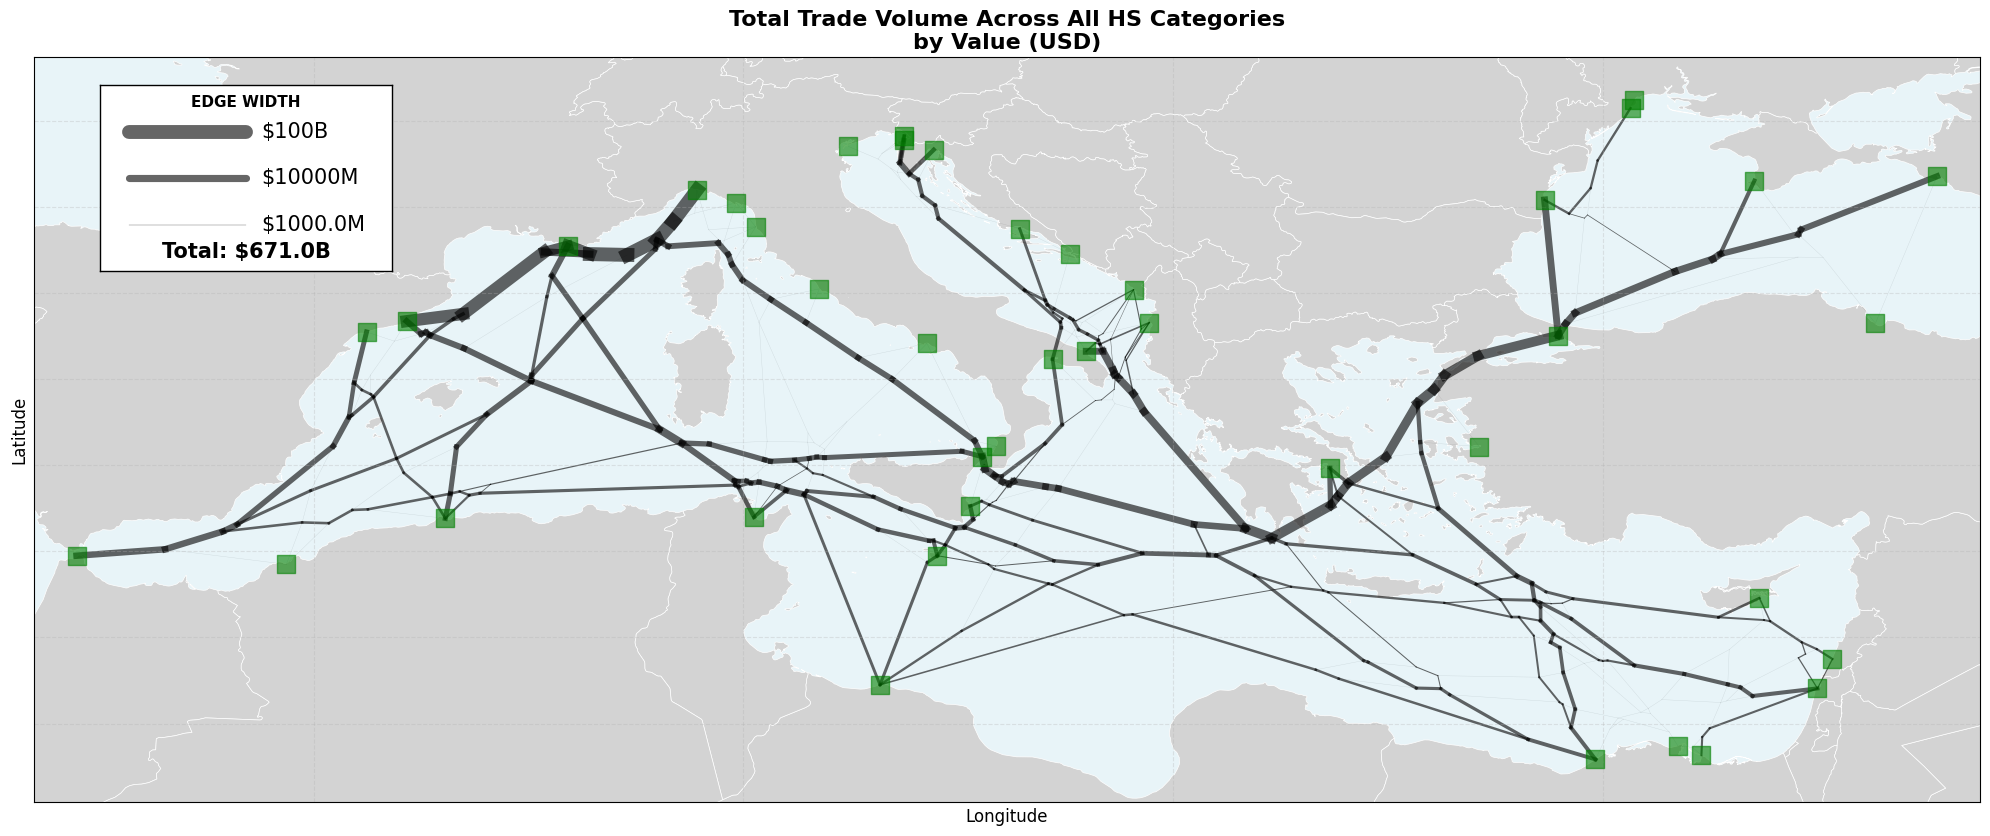

In [308]:
# Example: Plot HS10 (Cereals) trade volume by weight with orange edges
plot_cargo_volume("TOTAL", edge_color='black', metric='value')

/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


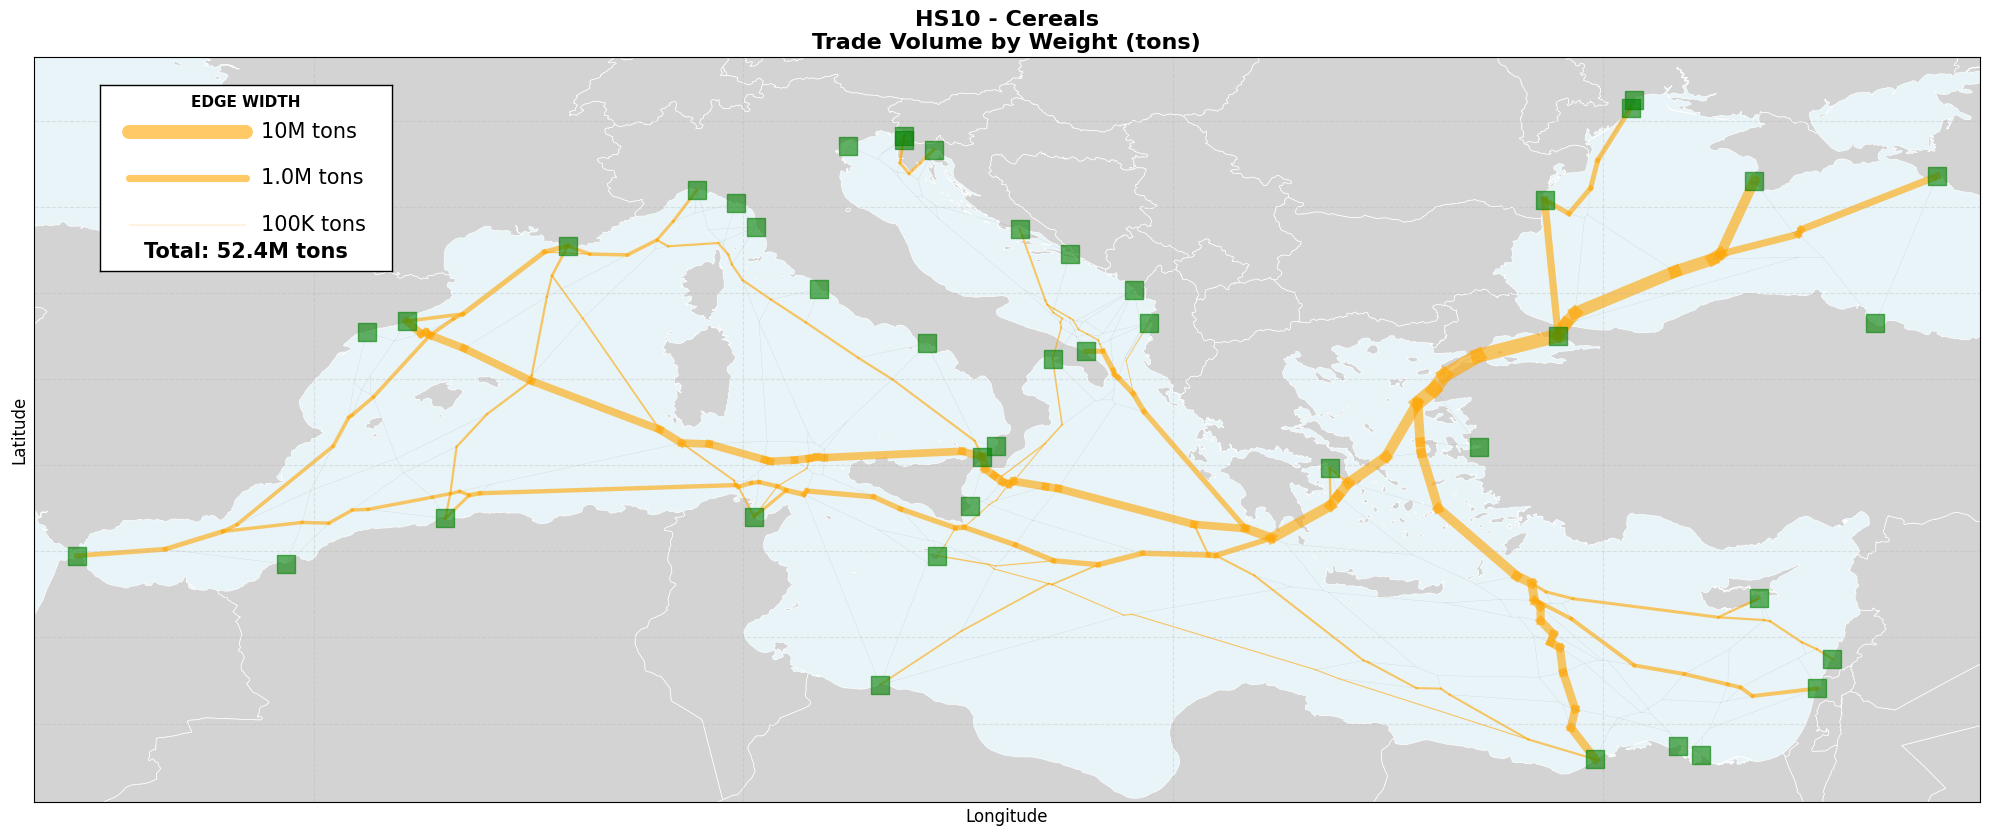

In [314]:
# Example: Plot HS10 (Cereals) trade volume by value with green edges

plot_cargo_volume(hs_code=10, edge_color='orange', metric='weight')

/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


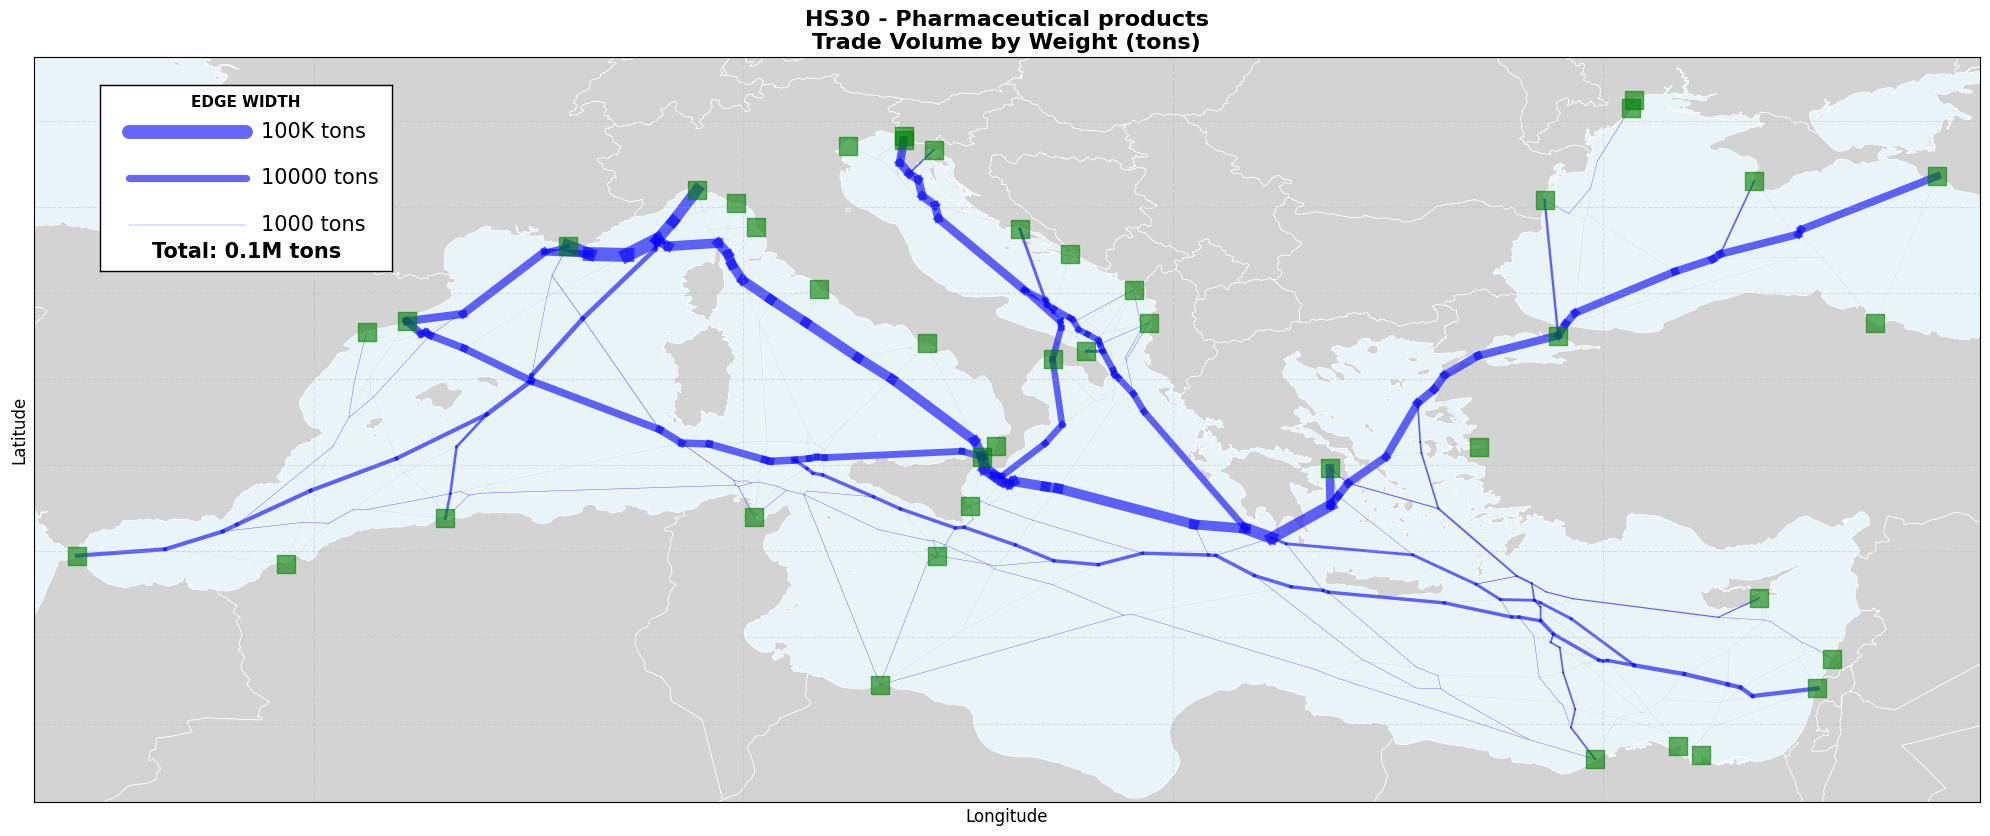

In [315]:
# Example: Plot HS25 (Salt/Stone/Cement) trade volume by weight with blue edges
plot_cargo_volume(hs_code=30, edge_color='blue', metric='weight')

/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


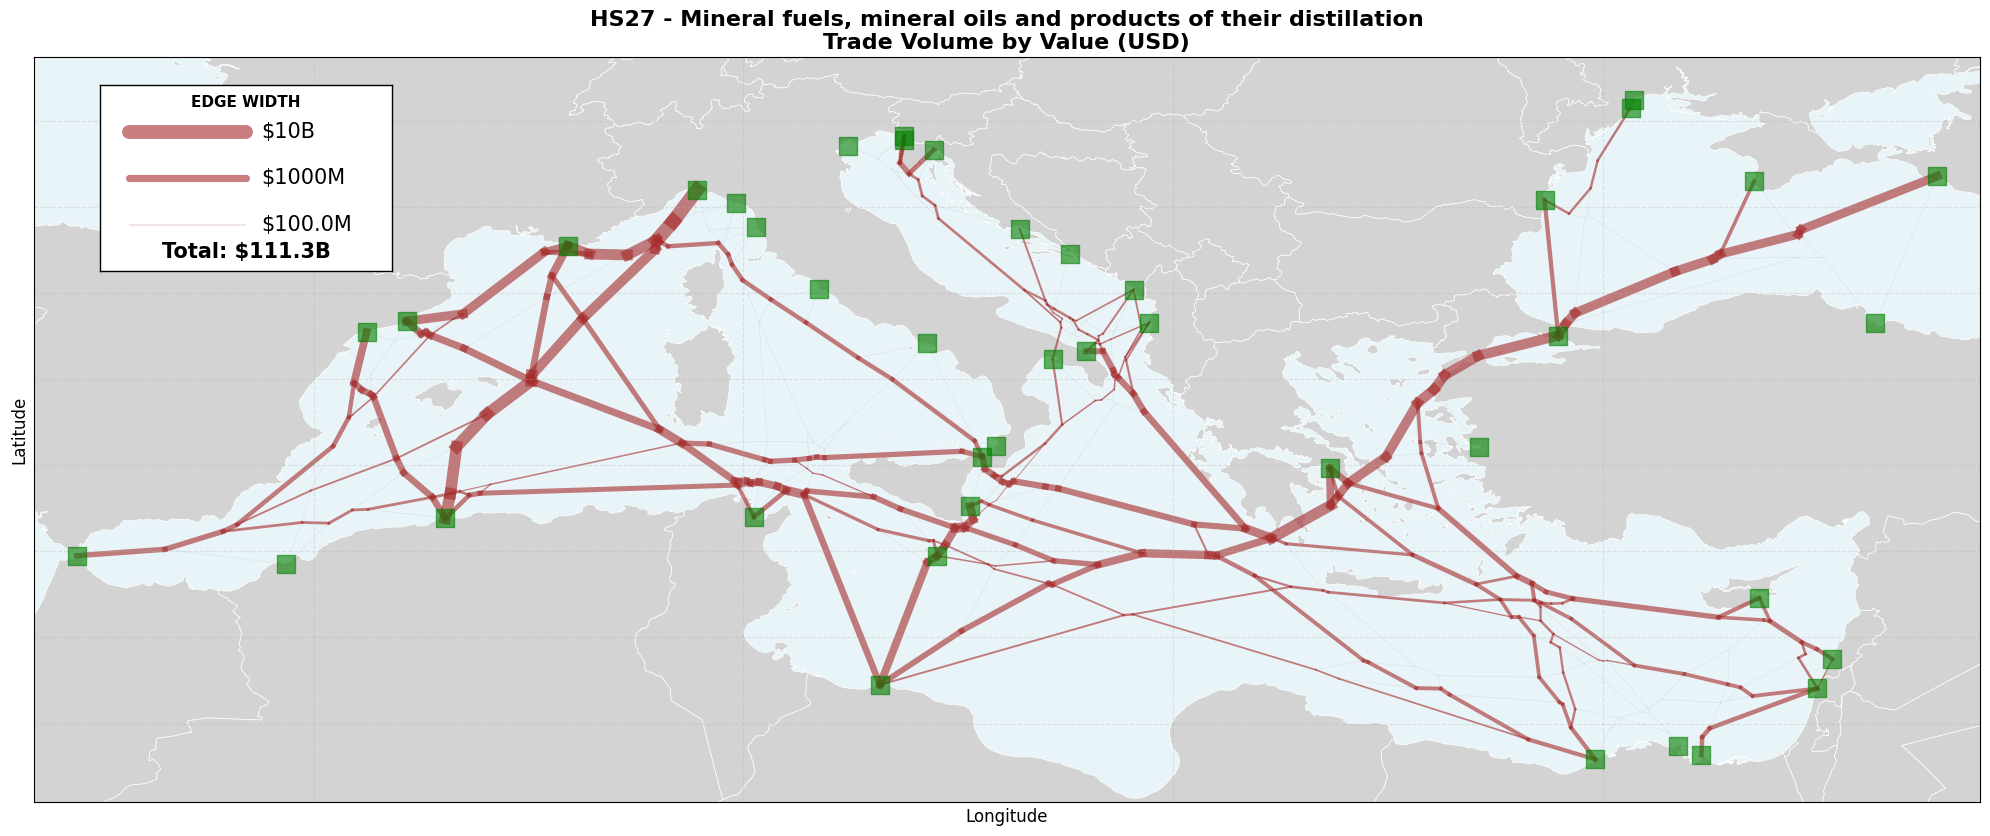

In [311]:
# Example: Plot HS27 (Mineral Fuels) trade volume by value with brown edges
plot_cargo_volume(hs_code=27, edge_color='brown', metric='value')

/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


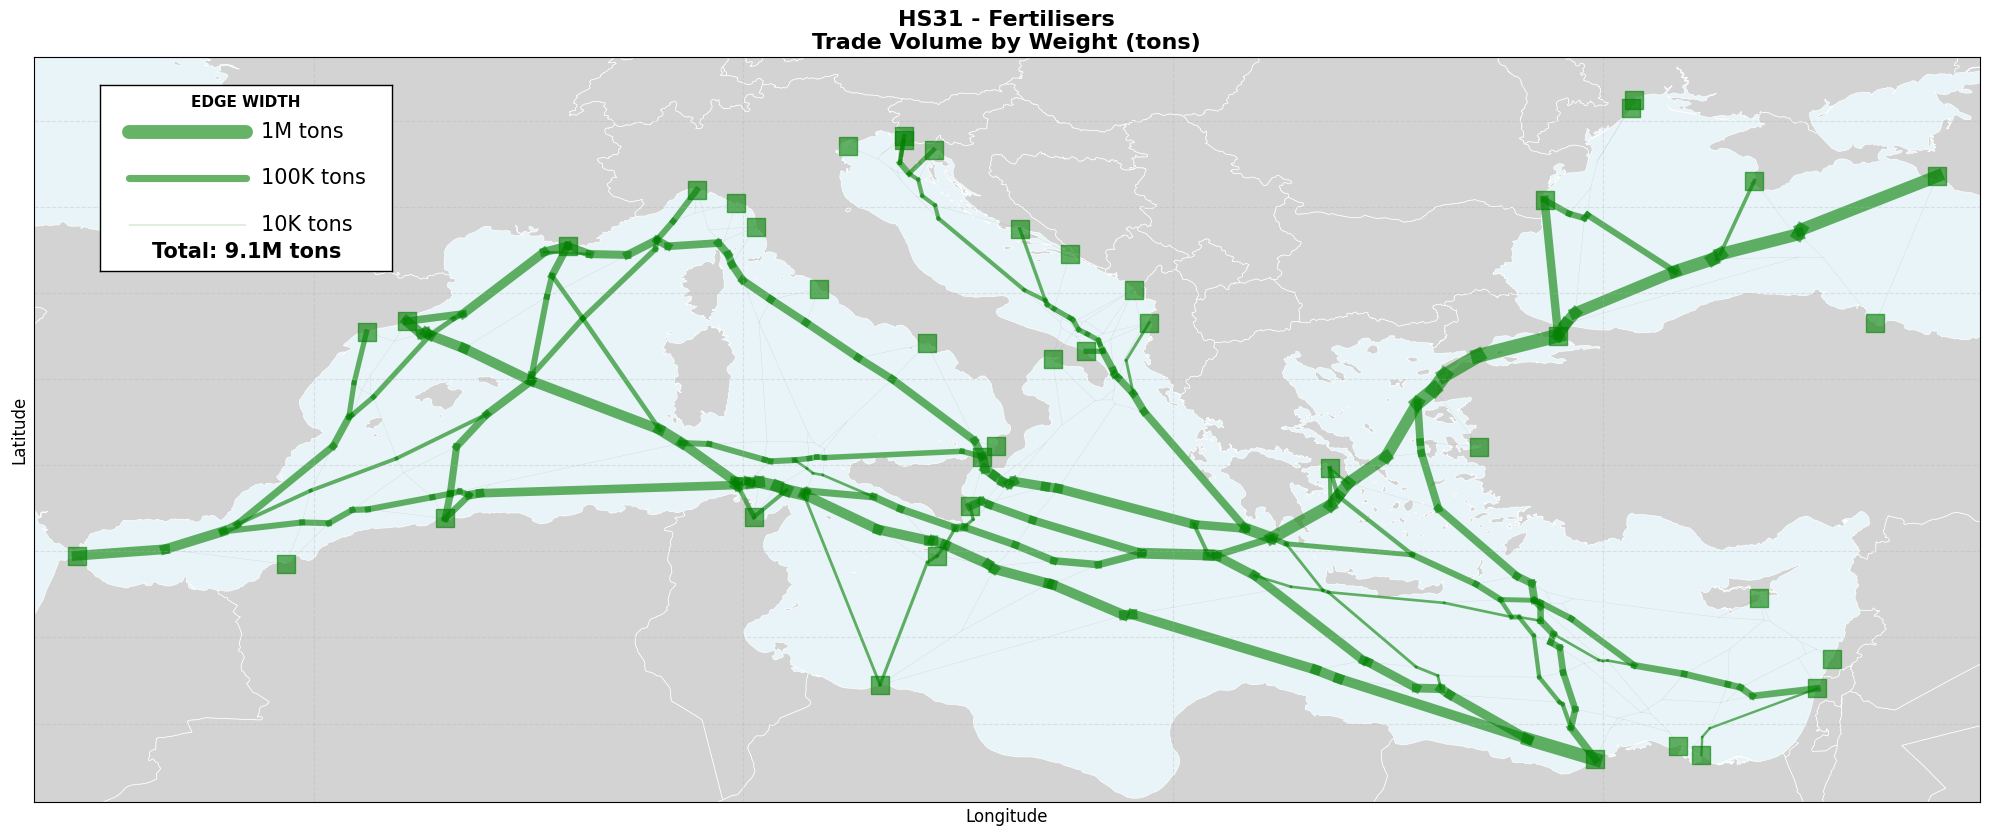

In [312]:
# Example: Plot HS31 (Fertilizers) trade volume by weight with green edges
plot_cargo_volume(hs_code=31, edge_color='green', metric='weight')

/var/folders/3d/fbytqdpn2m599fcr4p1zr9_h0000gn/T/ipykernel_82094/2278826093.py:216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


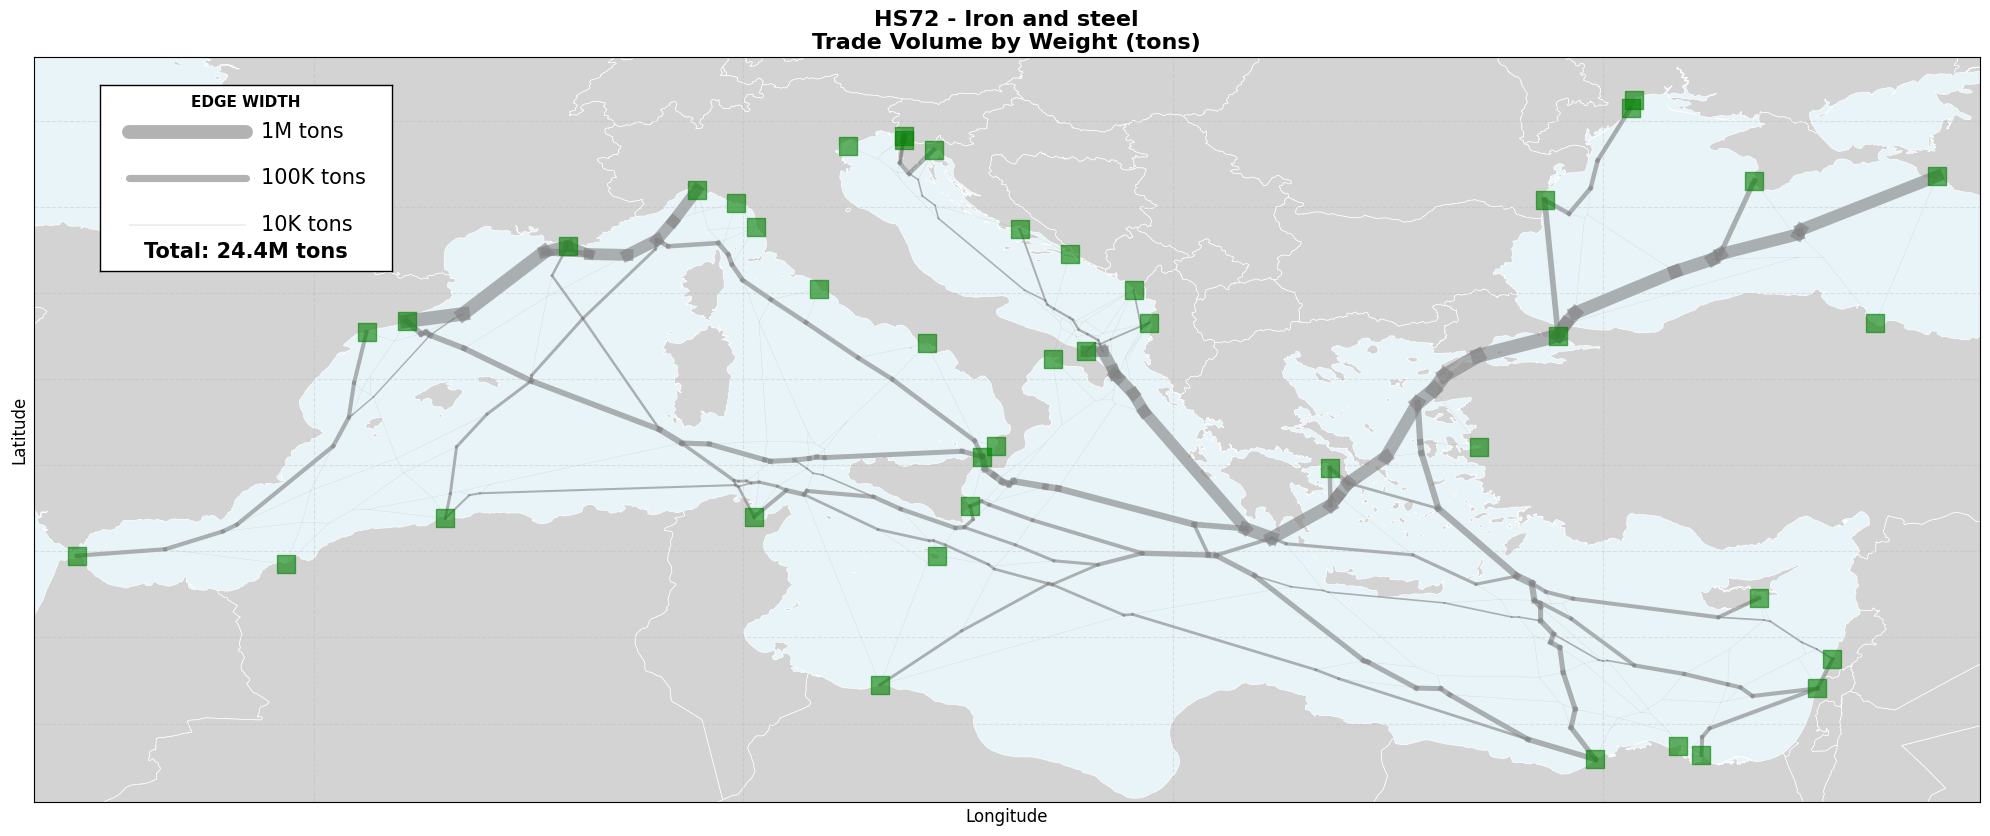

In [313]:
# Example: Plot HS72 (Iron/Steel) trade volume by weight with gray edges
plot_cargo_volume(hs_code=72, edge_color='gray', metric='weight')